In [ ]:
# Connect Google Colab with my Drive
from google.colab import drive 
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
# Unzip quietly the folder 
!unzip -q /content/gdrive/MyDrive/CatsDogs.zip 

In [ ]:
# Import necessary libraries 
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten, Dropout 
from tensorflow.keras import layers

In [ ]:
# Delete from the folder the corrupted images
import os 
for folder_path in ["/content/CatsDogs/Cats", "/content/CatsDogs/Dogs"]:
  for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
      obj = open(file_path, "rb")
      is_jfif = tf.compat.as_bytes("JFIF") in obj.peek(10)
    finally:
      obj.close()
    if is_jfif == False:
      os.remove(file_path)

In [ ]:
# Assign hyperparameters values 
INPUT_SHAPE = (128,128) 
BATCH_SIZE = 32

In [ ]:
# Create a dataframe with uncorrupted cats and dogs images 
df = pd.DataFrame(columns=["Path", "Class"])
dirs = ['/content/CatsDogs/Cats', '/content/CatsDogs/Dogs']
for dir in dirs:
  paths= os.listdir(dir)
  class_name=dir.split("/")[-1]
  df_temp = pd.DataFrame({"Path": paths, "Class": class_name})
  df_temp["Path"] = dir + "/" + df_temp["Path"].astype(str)
  df = pd.concat([df,df_temp])
df.sort_values(by="Path", inplace=True, ignore_index=True)

In [ ]:
shuffled = df.sample(frac=1,random_state=1)
shuffled.tail()

,Path,Class
10955,/content/CatsDogs/Cats/9244.jpg,Cats
17289,/content/CatsDogs/Dogs/4080.jpg,Dogs
5192,/content/CatsDogs/Cats/373.jpg,Cats
12172,/content/CatsDogs/Dogs/10413.jpg,Dogs
235,/content/CatsDogs/Cats/10221.jpg,Cats


In [ ]:
# Split the dataframe into training, validation and test set
rowsplice = int(0.8*len(shuffled))
df_train_valid = shuffled.iloc[:rowsplice]
df_test = shuffled.iloc[rowsplice:]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenA = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
datagenB= ImageDataGenerator( rescale= 1.0/255)

In [ ]:
training_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                           directory="/content/CatsDogs",
                                           x_col ='Path',
                                           y_col='Class',
                                           target_size=(128,128),
                                           class_mode='binary',
                                           subset='training',
                                           seed=10)

Found 14983 validated image filenames belonging to 2 classes.


In [ ]:
validation_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             subset='validation',
                                             seed=10)

Found 3745 validated image filenames belonging to 2 classes.


In [ ]:
test_ds= datagenB.flow_from_dataframe(dataframe=df_test,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             shuffle=False,
                                             seed=10)

Found 4682 validated image filenames belonging to 2 classes.


**Models 3 w/ Dropout function**

In [ ]:
# Modello 3 w/ Dropout (0.2-0.3)
model_3=Sequential()

model_3.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(filters=64, kernel_size=(3,3)))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2))) 
model_3.add(Dropout(0.2))

model_3.add(Conv2D(filters=64, kernel_size=(3,3)))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2))) 
model_3.add(Dropout(0.2))

model_3.add(Flatten())
model_3.add(Dense(64)) 
model_3.add(Activation("relu"))
model_3.add(Dropout(0.3))

model_3.add(Dense(1))
model_3.add(Activation("sigmoid"))

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                        

In [ ]:
mod_3 = model_3.fit(training_ds,epochs=50,validation_data = validation_ds)

Epoch 1/50
469/469 [==============================] - 79s 138ms/step - loss: 0.6922 - accuracy: 0.5282 - val_loss: 0.6655 - val_accuracy: 0.5917
Epoch 2/50
469/469 [==============================] - 62s 132ms/step - loss: 0.6340 - accuracy: 0.6334 - val_loss: 0.5613 - val_accuracy: 0.7063
Epoch 3/50
469/469 [==============================] - 63s 134ms/step - loss: 0.5551 - accuracy: 0.7175 - val_loss: 0.5309 - val_accuracy: 0.7397
Epoch 4/50
469/469 [==============================] - 64s 135ms/step - loss: 0.5041 - accuracy: 0.7537 - val_loss: 0.4764 - val_accuracy: 0.7792
Epoch 5/50
469/469 [==============================] - 62s 132ms/step - loss: 0.4630 - accuracy: 0.7843 - val_loss: 0.4672 - val_accuracy: 0.7698
Epoch 6/50
469/469 [==============================] - 63s 134ms/step - loss: 0.4225 - accuracy: 0.8096 - val_loss: 0.4258 - val_accuracy: 0.8053
Epoch 7/50
469/469 [==============================] - 73s 155ms/step - loss: 0.3876 - accuracy: 0.8297 - val_loss: 0.4469 - val_ac

Text(0.5, 1.0, 'Training and Validation loss')

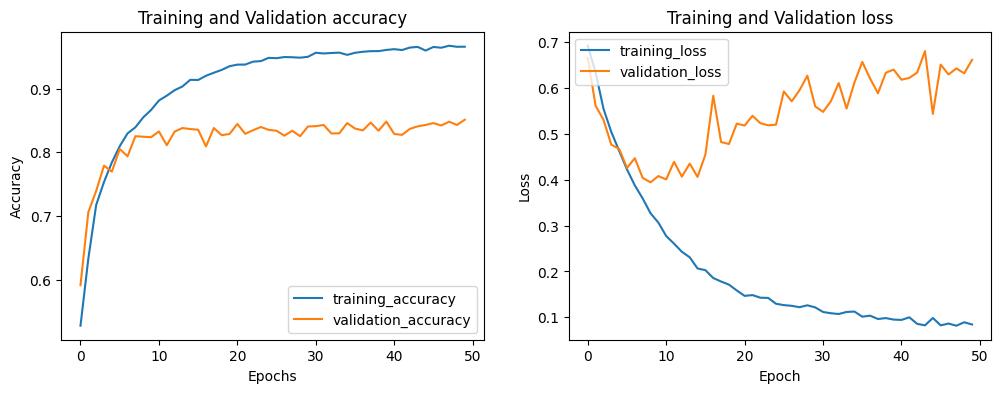

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_3.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_3.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_3.history['loss'], label='training_loss')
plt.plot(mod_3.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_3.evaluate(test_ds)

147/147 [==============================] - 15s 101ms/step - loss: 0.6335 - accuracy: 0.8531


[0.6335434913635254, 0.8530542254447937]

In [ ]:
# Modello 3.2 w/ Dropout (0.2-0.3) 
model_32=Sequential()

model_32.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_32.add(Activation(activation="relu"))
model_32.add(MaxPooling2D(pool_size=(2,2)))
model_32.add(Dropout(0.2))

model_32.add(Conv2D(filters=64, kernel_size=(3,3)))
model_32.add(Activation(activation="relu"))
model_32.add(MaxPooling2D(pool_size=(2,2))) 
model_32.add(Dropout(0.2))

model_32.add(Conv2D(filters=128, kernel_size=(3,3)))
model_32.add(Activation(activation="relu"))
model_32.add(MaxPooling2D(pool_size=(2,2)))
model_32.add(Dropout(0.2)) 

model_32.add(Flatten())
model_32.add(Dense(64)) 
model_32.add(Activation("relu"))
model_32.add(Dropout(0.3))

model_32.add(Dense(1))
model_32.add(Activation("sigmoid"))

In [ ]:
model_32.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])
model_32.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_6 (Activation)   (None, 61, 61, 64)        0         
                                                      

In [ ]:
mod_32 = model_32.fit(training_ds,epochs=50,validation_data = validation_ds)

Epoch 1/50
469/469 [==============================] - 64s 131ms/step - loss: 0.6579 - accuracy: 0.5919 - val_loss: 0.5756 - val_accuracy: 0.7031
Epoch 2/50
469/469 [==============================] - 63s 133ms/step - loss: 0.5572 - accuracy: 0.7115 - val_loss: 0.5503 - val_accuracy: 0.7196
Epoch 3/50
469/469 [==============================] - 61s 131ms/step - loss: 0.4992 - accuracy: 0.7577 - val_loss: 0.4987 - val_accuracy: 0.7578
Epoch 4/50
469/469 [==============================] - 64s 136ms/step - loss: 0.4489 - accuracy: 0.7940 - val_loss: 0.4494 - val_accuracy: 0.7960
Epoch 5/50
469/469 [==============================] - 62s 131ms/step - loss: 0.4059 - accuracy: 0.8142 - val_loss: 0.4093 - val_accuracy: 0.8198
Epoch 6/50
469/469 [==============================] - 63s 135ms/step - loss: 0.3713 - accuracy: 0.8358 - val_loss: 0.4320 - val_accuracy: 0.8035
Epoch 7/50
469/469 [==============================] - 62s 131ms/step - loss: 0.3359 - accuracy: 0.8517 - val_loss: 0.4035 - val_ac

Text(0.5, 1.0, 'Training and Validation loss')

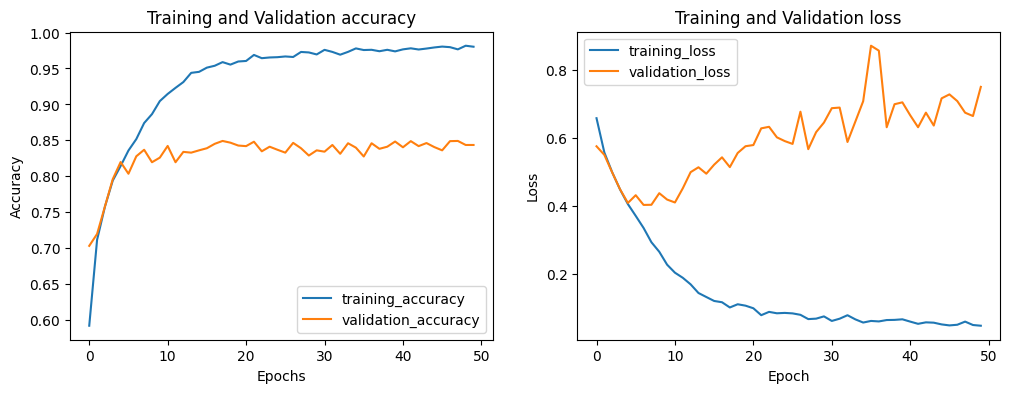

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_32.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_32.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_32.history['loss'], label='training_loss')
plt.plot(mod_32.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_32.evaluate(test_ds)

147/147 [==============================] - 16s 107ms/step - loss: 0.8271 - accuracy: 0.8398


[0.8270576000213623, 0.8398120403289795]